In [1]:
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/specky3512/anaconda3/lib/python3.7/site-packages (0.0)


In [25]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
import requests
import config
import json
import time
import datetime
import matplotlib.pyplot as plt

from pprint import pprint

In [3]:
df = pd.read_csv('data_files/fullplayerstatslist.csv')

In [4]:
df

,Unnamed: 0,Unnamed: 0.1,First_Name,Last_Name,player_id,Position,Points,Free_Throw_Percent,Two_Pt_Percent,Three_Pt_Percent,...,Turnovers,Team,Home_Away,win,Team_points,Min_played,Crowd,Stadium_Cap,game_id,game_date
0,0,0,LeBron,James,0afbe608-940a-4d5d-a1f7-468718c67d91,F,19,50.0,81.818,0.0,...,4,Cavaliers,1,1,117,32:23,20562,20562,0da78f13-73ac-4465-8e31-ecc3029a5dc6,2016-10-25T23:30:00+00:00
1,1,1,James,Jones,09d25155-c3be-4246-a986-55921a1b5e61,G-F,5,100.0,0.000,100.0,...,0,Cavaliers,1,1,117,5:30,20562,20562,0da78f13-73ac-4465-8e31-ecc3029a5dc6,2016-10-25T23:30:00+00:00
2,2,2,J.R.,Smith,5934134d-0d27-42ea-a554-4b0e3e85ce56,G-F,8,0.0,20.000,25.0,...,0,Cavaliers,1,1,117,25:14,20562,20562,0da78f13-73ac-4465-8e31-ecc3029a5dc6,2016-10-25T23:30:00+00:00
3,3,3,Kay,Felder,8d3acdd5-9b5a-4d69-9912-de42d979c31a,G,0,0.0,0.000,0.0,...,0,Cavaliers,1,1,117,00:00,20562,20562,0da78f13-73ac-4465-8e31-ecc3029a5dc6,2016-10-25T23:30:00+00:00
4,4,4,Mike,Dunleavy,4ec1bff7-ec1b-488b-8a24-aed83e62b4ce,G-F,4,0.0,100.000,0.0,...,0,Cavaliers,1,1,117,22:32,20562,20562,0da78f13-73ac-4465-8e31-ecc3029a5dc6,2016-10-25T23:30:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182364,8965,8965,Marial,Shayok,0a530034-a07c-4db3-a99e-17c5254c07e1,G-F,5,100.0,0.000,33.3,...,1,76ers,0,1,134,7:56,Covid,8000,0fca55cb-4bc8-4646-a2e6-75d95a20270b,2020-08-15T01:00:00+00:00
182365,8966,8966,Josh,Richardson,ef11cca9-6605-44e8-943e-193c7b821465,G,5,0.0,50.000,50.0,...,0,76ers,0,1,134,23:18,Covid,8000,0fca55cb-4bc8-4646-a2e6-75d95a20270b,2020-08-15T01:00:00+00:00
182366,8967,8967,Glenn,Robinson III,7f462af0-2ac8-4ca5-aa5a-17b37dc5001b,F,0,0.0,0.000,0.0,...,0,76ers,0,1,134,00:00,Covid,8000,0fca55cb-4bc8-4646-a2e6-75d95a20270b,2020-08-15T01:00:00+00:00
182367,8968,8968,Raul,Neto,8e7ffd66-f779-418c-bf18-b9f746a1c5fe,G,14,71.4,60.000,33.3,...,0,76ers,0,1,134,18:44,Covid,8000,0fca55cb-4bc8-4646-a2e6-75d95a20270b,2020-08-15T01:00:00+00:00


In [5]:
#dropping Crowd from df_dropped to check status weight v win & try to tweat training % up from 71
df_dropped = df[df['Min_played'] != "00:00"]
df_dropped = df_dropped[df_dropped['Crowd'] != 'Covid']
df_dropped = df_dropped[df_dropped['Crowd'] != '0']
df_dropped= df_dropped[["Points", "Free_Throw_Percent",
                  "Two_Pt_Percent",
                  "Three_Pt_Percent", "Assists",
                  "Rebounds", "Offensive_Rebounds",
                  "Steals", "Personal_Fouls",
                  "Flagrant_Fouls", "Tech_Fouls",
                  "Turnovers",
                  "Home_Away", "win"
                  ]].reset_index(drop = True)
df_dropped

,Points,Free_Throw_Percent,Two_Pt_Percent,Three_Pt_Percent,Assists,Rebounds,Offensive_Rebounds,Steals,Personal_Fouls,Flagrant_Fouls,Tech_Fouls,Turnovers,Home_Away,win
0,19,50.0,81.818,0.0,14,11,3,0,3,0,0,4,1,1
1,5,100.0,0.000,100.0,0,0,0,0,1,0,0,0,1,1
2,8,0.0,20.000,25.0,2,3,0,1,1,0,0,0,1,1
3,4,0.0,100.000,0.0,2,4,0,3,0,0,0,0,1,1
4,23,75.0,44.444,33.3,2,12,2,3,3,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120379,12,0.0,50.000,40.0,3,8,1,1,4,0,0,2,0,0
120380,9,100.0,100.000,66.7,0,2,0,0,3,0,0,0,0,0
120381,25,100.0,63.600,27.3,5,6,0,1,2,0,0,4,0,0
120382,14,0.0,87.500,0.0,8,13,2,0,3,0,0,5,0,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [16]:
X = df_dropped.drop('win', axis=1)
X = X.to_numpy()
print(X.shape)


(120384, 13)


In [17]:
y = df_dropped['win']
y = y.to_numpy()
print(y.shape)

(120384,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [20]:
X_train

array([[  2.   ,   0.   , 100.   , ...,   0.   ,   1.   ,   0.   ],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
       [  5.   ,   0.   ,  50.   , ...,   0.   ,   0.   ,   1.   ],
       ...,
       [  7.   ,  66.7  ,  14.286, ...,   0.   ,   0.   ,   0.   ],
       [  7.   ,   0.   ,  28.571, ...,   0.   ,   0.   ,   1.   ],
       [ 18.   ,  50.   ,  80.   , ...,   0.   ,   1.   ,   0.   ]])

In [21]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))

In [22]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


k: 1, Train/Test Score: 0.941/0.657
k: 3, Train/Test Score: 0.780/0.580
k: 5, Train/Test Score: 0.713/0.571
k: 7, Train/Test Score: 0.684/0.569
k: 9, Train/Test Score: 0.667/0.565
k: 11, Train/Test Score: 0.657/0.567
k: 13, Train/Test Score: 0.648/0.567
k: 15, Train/Test Score: 0.640/0.567
k: 17, Train/Test Score: 0.633/0.564
k: 19, Train/Test Score: 0.631/0.565
k: 21, Train/Test Score: 0.626/0.565
k: 23, Train/Test Score: 0.621/0.562
k: 25, Train/Test Score: 0.618/0.562
k: 27, Train/Test Score: 0.616/0.559
k: 29, Train/Test Score: 0.613/0.560
k: 31, Train/Test Score: 0.610/0.561
k: 33, Train/Test Score: 0.607/0.564
k: 35, Train/Test Score: 0.606/0.561
k: 37, Train/Test Score: 0.605/0.561
k: 39, Train/Test Score: 0.604/0.563
k: 41, Train/Test Score: 0.603/0.564
k: 43, Train/Test Score: 0.602/0.562
k: 45, Train/Test Score: 0.600/0.560
k: 47, Train/Test Score: 0.600/0.559
k: 49, Train/Test Score: 0.599/0.562


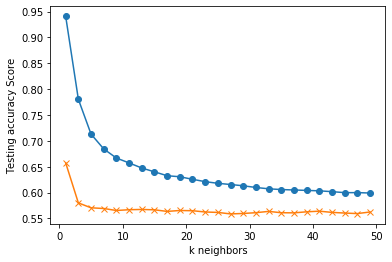

In [26]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [31]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))
X_test_scaled

k=9 Test Acc: 0.567


array([[-0.2303433 ,  1.7085817 ,  3.86294282, ..., -0.44577941,
        -0.40269219, -0.40269219],
       [-0.05799441,  1.7085817 ,  3.00119837, ..., -0.44577941,
        -0.44577941, -0.40269219],
       [ 0.11435448,  3.86294282,  1.94797431, ..., -0.44577941,
        -0.44577941, -0.44577941],
       ...,
       [-0.35960497, -0.44577941,  1.7085817 , ..., -0.44577941,
        -0.40269219, -0.44577941],
       [-0.14416885,  1.7085817 , -0.44577941, ..., -0.44577941,
        -0.40269219, -0.44577941],
       [ 0.58831392,  3.86294282,  2.01635373, ..., -0.44577941,
        -0.35960497, -0.40269219]])

In [29]:
new_iris_data = [[23,75.0,44.444,33.3,2,12,2,3,3,0,0,2,1,1]]
predicted_class = knn.predict(new_iris_data)
print(predicted_class)

ValueError: query data dimension must match training data dimension